<a href="https://www.kaggle.com/code/sonawanelalitsunil/pima-indian-diabetes-dataset?scriptVersionId=201697056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
#Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import operator
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pima = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [4]:
pima.shape

(768, 9)

In [5]:
type(pima)

pandas.core.frame.DataFrame

In [6]:
pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [7]:
pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Get data type for each attribute 

pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# Check the first 5 rows

pima.head (15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
# Check missing values

pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
nutritional_status_values = ['Healthy', 'Underweight', 'Overweight', 'Obese', 'Healthy']

# Create a new DataFrame with the Nutritional_status column
df = pd.DataFrame({'Nutritional_status': nutritional_status_values})

# Print the DataFrame
print(df)


  Nutritional_status
0            Healthy
1        Underweight
2         Overweight
3              Obese
4            Healthy


In [12]:
Nutritional_status = pd.Series([]) 

/tmp/ipykernel_20/3621753142.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Nutritional_status = pd.Series([])


In [13]:
# Nutritional status based on BMI

for i in range(len(pima)): 
    if pima['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif pima['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif pima['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif pima['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i] 

In [14]:
# Insert new column - Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [15]:
# Check df containing new column
pima.head (15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1
5,5,116,74,0,0,25.6,Overweight,0.201,30,0
6,3,78,50,32,88,31.0,Obese,0.248,26,1
7,10,115,0,0,0,35.3,Obese,0.134,29,0
8,2,197,70,45,543,30.5,Obese,0.158,53,1
9,8,125,96,0,0,0.0,NA,0.232,54,1


In [16]:
pima['Nutritional Status'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: Nutritional Status, dtype: int64

In [17]:
import pandas as pd

# Create an empty Series with dtype specified as 'object'
OGTT_Interpretation = pd.Series([], dtype='object')

# Print the empty Series
print(OGTT_Interpretation)


Series([], dtype: object)


In [18]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(pima)): 
    if pima['Glucose'][i] == 0.0: 
        OGTT_Interpretation [i]="NA"
    
    elif pima['Glucose'][i] <= 140: 
        OGTT_Interpretation [i]="Normal"
    
    elif pima['Glucose'][i] > 140 & pima['Glucose'][i] <= 198: 
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"
        
    elif pima['Glucose'][i] > 198: 
        OGTT_Interpretation[i]="Diabetic Level"
        
    else: 
        OGTT_Interpretation [i]= pima['Glucose'][i] 

In [19]:
# Insert new column - Glucose Result
pima.insert(2, "Glucose Result", OGTT_Interpretation)

In [20]:
pima['Glucose Result'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: Glucose Result, dtype: int64

In [21]:
Impaired_Glucose_Tolerance_Diabetic = ((pima ['Glucose'] > 140 ) & (pima ['Glucose'] <= 198) & (pima ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

131

In [22]:
Normal_Glucose_Diabetic = ((pima ['Glucose'] != 0 ) & (pima ['Glucose'] <= 140) & (pima ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

In [23]:
Percentile_skin_thickness = pd.Series([], dtype='int')

# Or, create an empty Series with dtype specified as 'float'
# Percentile_skin_thickness = pd.Series([], dtype='float')

# Print the empty Series
print(Percentile_skin_thickness)

Series([], dtype: int64)


In [24]:

pima['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [25]:
#  Check skin fold thickness Percentile

for i in range(len(pima)): 
    
    
    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0: 
        
        if pima["SkinThickness"][i] == 0.0: 
            Percentile_skin_thickness[i]=" 0 NA"
    
        elif pima["SkinThickness"][i] < 11.9: 
            Percentile_skin_thickness[i]="1 <P5th"
        
        elif pima["SkinThickness"][i] == 11.9: 
            Percentile_skin_thickness[i]="2 P5th"
        
        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0: 
            Percentile_skin_thickness[i]="3 P5th - P10th"
        
        elif pima["SkinThickness"][i] == 14.0: 
            Percentile_skin_thickness[i]="4 P10th"
        
        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8: 
            Percentile_skin_thickness[i]="5 P10th - P15th"
        
        elif pima["SkinThickness"][i] == 15.8: 
            Percentile_skin_thickness[i]="6 P15th"
    
        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0: 
            Percentile_skin_thickness[i]="7 P15th - P25th"
    
        elif pima["SkinThickness"][i] == 18.0: 
            Percentile_skin_thickness[i]="8 P25th"
        
        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5: 
            Percentile_skin_thickness[i]="9 P25th - P50th"
   
        elif pima["SkinThickness"][i] == 23.5: 
            Percentile_skin_thickness[i]="10 P50th"
        
        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0: 
            Percentile_skin_thickness[i]="11 P50th - P75th"
        
        elif pima["SkinThickness"][i] == 29.0: 
            Percentile_skin_thickness[i]="12 P75th"
        
        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9: 
            Percentile_skin_thickness[i]="13 P75th - P85th"
        
        elif pima["SkinThickness"][i] == 31.9: 
            Percentile_skin_thickness[i]="14 P85th"
        
        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7: 
            Percentile_skin_thickness[i]="15 P85th - P90th"
    
        elif pima["SkinThickness"][i] == 33.7: 
            Percentile_skin_thickness[i]="16 P90th"
        
        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9: 
            Percentile_skin_thickness[i]="17 P90th - P95th"
    
        elif pima["SkinThickness"][i] == 35.9: 
            Percentile_skin_thickness[i]="18 P95th"
        
        elif pima["SkinThickness"][i] > 35.9: 
            Percentile_skin_thickness[i]="19 >P95th"
            
    elif pima["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  pima["SkinThickness"][i] > 31.7: 
            Percentile_skin_thickness[i]="20 >P95th"

In [26]:
# Insert new column - Percentile of skin thickness

pima.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

In [27]:
# Check the first 5 rows

pima.head(15)

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1
5,5,116,Normal,74,0 NA,0,0,25.6,Overweight,0.201,30,0
6,3,78,Normal,50,15 P85th - P90th,32,88,31.0,Obese,0.248,26,1
7,10,115,Normal,0,0 NA,0,0,35.3,Obese,0.134,29,0
8,2,197,Impaired Glucose Tolerance,70,19 >P95th,45,543,30.5,Obese,0.158,53,1
9,8,125,Normal,96,0 NA,0,0,0.0,NA,0.232,54,1


In [28]:
# Check number of women x Percentile of skin thickness

pima['Percentile skin thickness'].value_counts()

 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
8 P25th              20
7 P15th - P25th      20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: Percentile skin thickness, dtype: int64

In [29]:
diabetic_malnourished_st = ((pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_st

94

In [30]:
diabetic_malnourished_bmi = ((pima ['BMI'] < 18.5) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [31]:
diabetic_malnourished_bmi_st = ((pima ['BMI'] < 18.5) & (pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

In [32]:
pima.min()

Pregnancies                                           0
Glucose                                               0
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                         0
Percentile skin thickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                 0.0
Nutritional Status                                   NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

In [33]:
pima.max()

Pregnancies                               17
Glucose                                  199
Glucose Result                        Normal
BloodPressure                            122
Percentile skin thickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [34]:
#Check if the sample were classified as Underweight presented a BMI lower than 18.5

pima_underweight = pima[pima['Nutritional Status'] =='Underweight']
pima_underweight

,Pregnancies,Glucose,Glucose Result,BloodPressure,Percentile skin thickness,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [35]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [36]:
# Another way of counting the outcome (diabetes)
count_not_diabetic = len(pima[pima['Outcome']==0])
count_not_diabetic

500

In [37]:
mean_by_outcome = pima.groupby('Outcome').mean(numeric_only=True)

# Print the mean values by Outcome
print(mean_by_outcome)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [38]:
mean_all_columns = pima.mean(numeric_only=True)

# Print the mean values for all columns
print(mean_all_columns)

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


In [39]:
# Shows women that contains information about Glucose

pima_glucose = pima.loc[pima['Glucose'] != 0]

In [40]:
pima_glucose.shape

(763, 12)

In [41]:
pima_glucose['Glucose'].mean()

121.6867627785059

In [42]:
mean_by_outcome = pima_glucose.groupby('Outcome').mean(numeric_only=True)

# Print the mean values by Outcome
print(mean_by_outcome)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.311871  110.643863      68.213280      19.631791   69.160966   
1           4.860902  142.319549      70.800752      22.056391  101.090226   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.317304                  0.430662  31.247485  
1        35.106015                  0.550605  37.052632  


In [43]:
pima_glucose['Glucose'].min()

44

In [44]:
pima_glucose['Glucose'].max()

199

In [45]:
# Shows women that have information about Blood pressure

pima_BloodPressure = pima.loc[pima['BloodPressure'] != 0]

In [46]:
pima_BloodPressure.shape

(733, 12)

In [47]:
# Check the average of blood pressure (only from women that don't have zero value of Blood Pressure)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [48]:
# Minimum and maximum of Blood Pressure from women that don't have zero value of Blood Pressure

In [49]:
pima_BloodPressure['BloodPressure'].min()

24

In [50]:
pima_BloodPressure['BloodPressure'].max()

122

In [51]:
##### 35 women don't have information about Blood Pressure as the result shows 733 rows.  The maximum value of Diastolic Blood Pressure shows that there are a possibility of some women to have hypertension (>90 mmHg) as it can be diagnosed when the blood pressure is 140/90 mmHg or higher (NICE, 2019). Diabetic individuals should be treated to Diastolic blood pressure goal of  less than 90 mmHg. It is recommended that blood pressure should be measured at least annually in an adult with type 2 diabetes without previously diagnosed hypertension or renal disease (NICE, 2019). Systolic Blood Pressure measure should have been included in this dataset as studies show that blood pressure equal or greater than 115/75 mmHg is associated with increased rates of several diseases, including heart failure, kidney disease and mortality (BOER et al, 2017). Looking at the minimum value of Diastolic Blood Pressure (24 mmHg) it is totally out of the normal range even when the heart is 'relaxing' (between 40 to 160 mmHg). Individual with Diastolic blood pressure less or equal to 60 mmHg has low blood pressure (BLOOD PRESSURE UK).

In [52]:
pima_insulin = pima.loc[pima['Insulin'] != 0]

In [53]:
pima_insulin.shape

(394, 12)

In [54]:
# Check average value of insulin from women that don't have zero value of insulin

pima_insulin['Insulin'].mean()

155.5482233502538

In [55]:
pima_insulin['Insulin'].min()

14

In [56]:
pima_insulin['Insulin'].max()

846

In [57]:
# Check women that don't have zero value of BMI

pima_BMI = pima.loc[pima['BMI'] != 0]

In [58]:
pima_BMI.shape

(757, 12)

In [59]:
# Check average of BMI from women that don't have zero value of BMI

pima_BMI['BMI'].mean()

32.457463672391015

In [60]:
##### The average value of BMI indicates obesity (BMI >= 30 kg/m2)

In [61]:
# Check minimun and maximum value of BMI from women that don't have zero value of BMI

In [62]:
pima_BMI['BMI'].min()

18.2

In [63]:
pima_BMI['BMI'].max()

67.1

In [64]:
# Check only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = pima.loc[(pima['BMI'] != 0) & (pima['Insulin'] != 0) & (pima['BloodPressure'] != 0) & (pima['Glucose'] != 0)]

In [65]:
pima_all.shape

(392, 12)

In [66]:
##### Only 392 women have information about all the attributes. That number represents less than half of the sample (around 49% of the women of the sample have all information of all attributes).

In [67]:
pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [68]:
mean_all_columns = pima_all.mean(numeric_only=True)

# Print the mean values for all columns
print(mean_all_columns)

Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64


In [69]:
mean_by_outcome = pima_all.groupby('Outcome').mean(numeric_only=True)

# Print the mean values by Outcome
print(mean_by_outcome)

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           2.721374  111.431298      68.969466      27.251908  130.854962   
1           4.469231  145.192308      74.076923      32.961538  206.846154   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        31.750763                  0.472168  28.347328  
1        35.777692                  0.625585  35.938462  


In [70]:
pima_all.min()

Pregnancies                                           0
Glucose                                              56
Glucose Result               Impaired Glucose Tolerance
BloodPressure                                        24
Percentile skin thickness                       1 <P5th
SkinThickness                                         7
Insulin                                              14
BMI                                                18.2
Nutritional Status                               Normal
DiabetesPedigreeFunction                          0.085
Age                                                  21
Outcome                                               0
dtype: object

In [71]:
pima_all.max()

Pregnancies                               17
Glucose                                  198
Glucose Result                        Normal
BloodPressure                            110
Percentile skin thickness    9 P25th - P50th
SkinThickness                             63
Insulin                                  846
BMI                                     67.1
Nutritional Status               Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [72]:
diabetic_malnourished = ((pima_all ['SkinThickness'] < 15.8) & (pima_all ['Outcome'] == 1)).sum()
diabetic_malnourished

4

In [73]:
diabetic_overweight_obese = ((pima_all ['BMI'] <= 30) & (pima_all ['Outcome'] == 1)).sum()
diabetic_overweight_obese

20

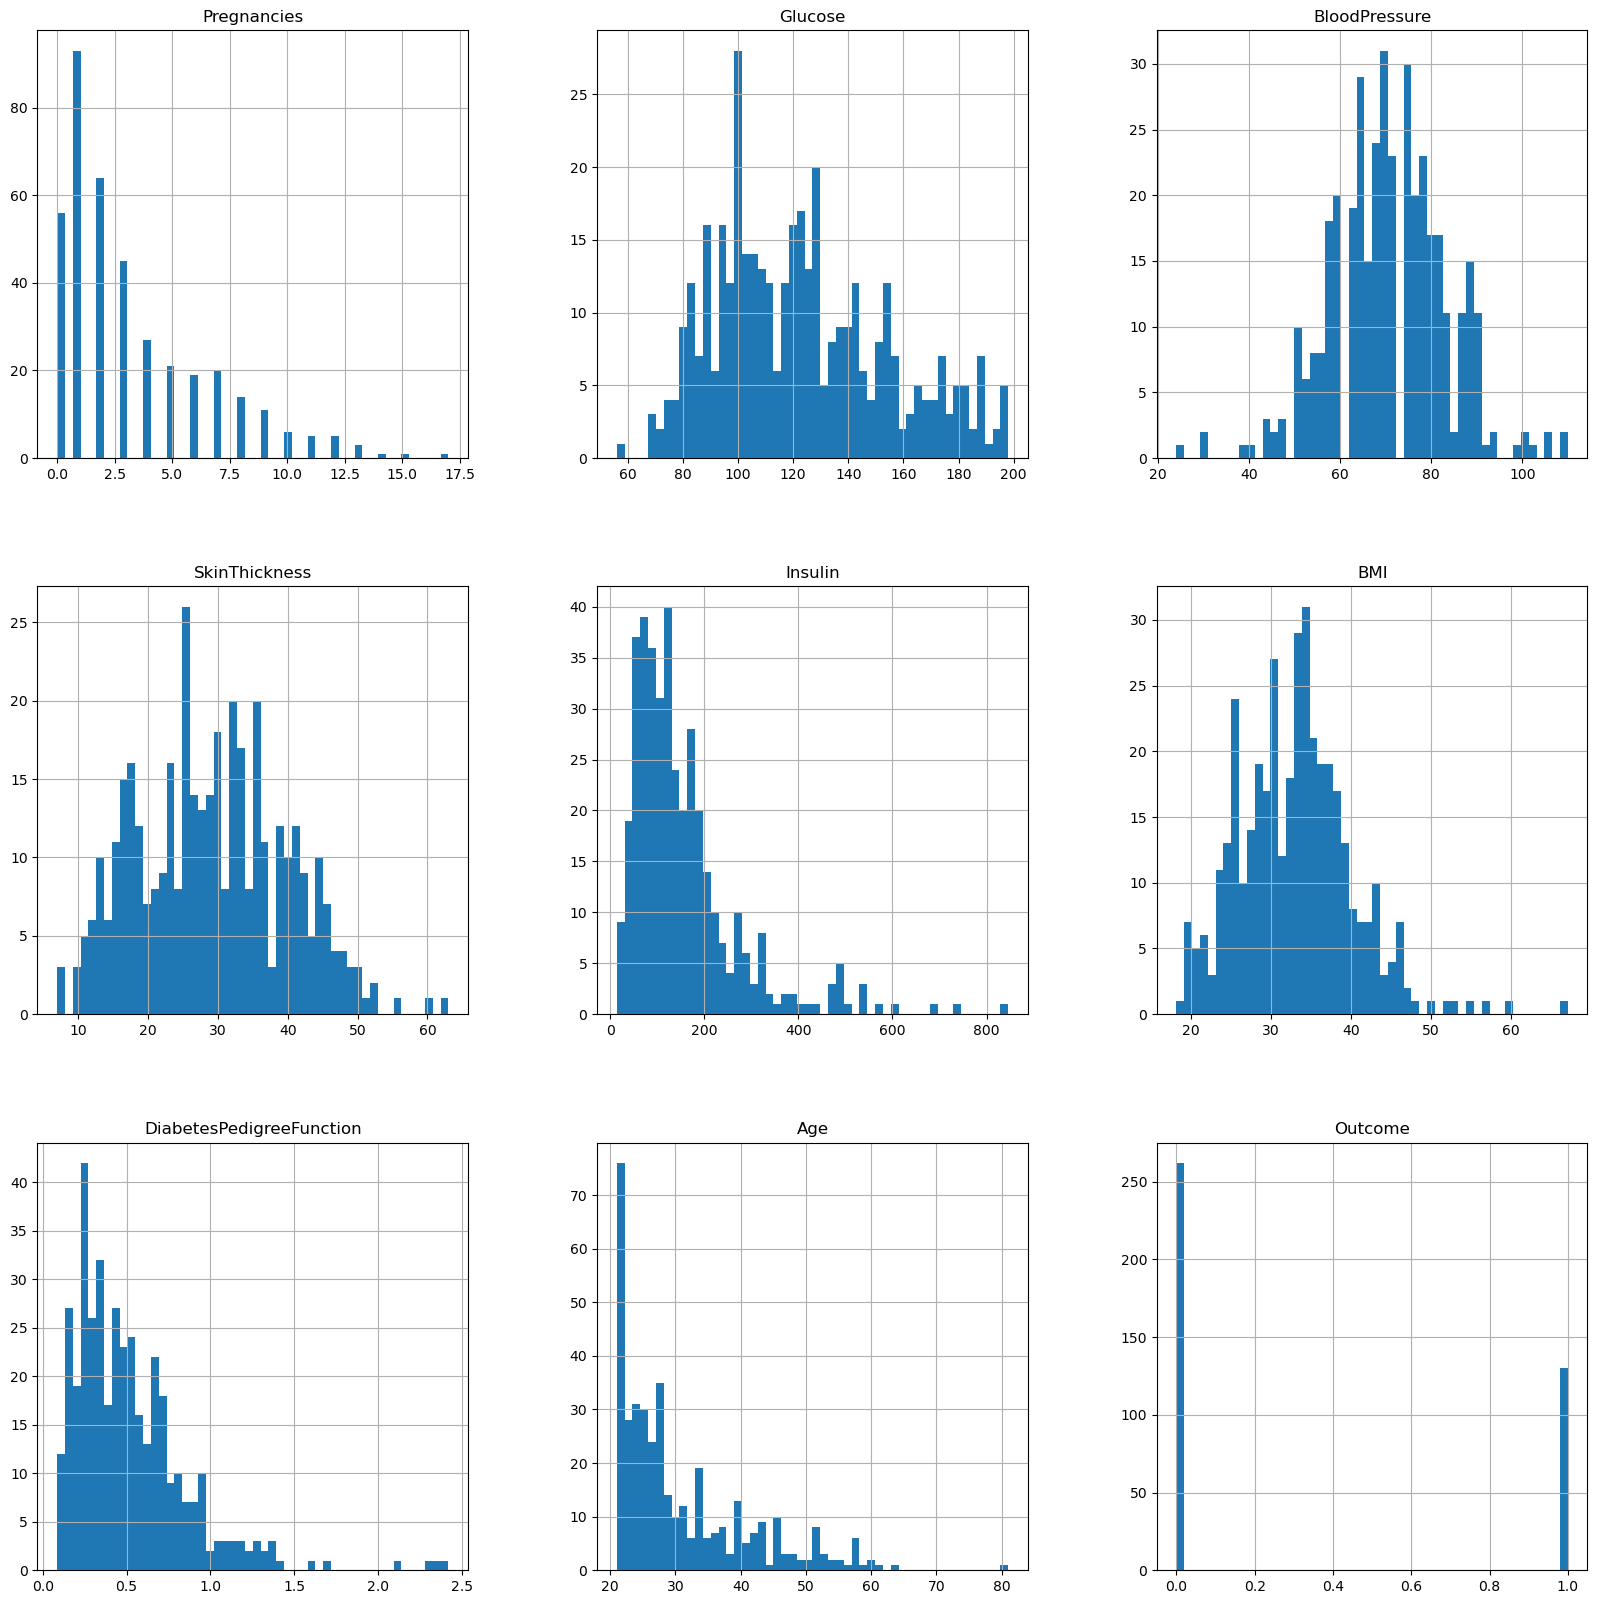

In [74]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 20))
plt.show()

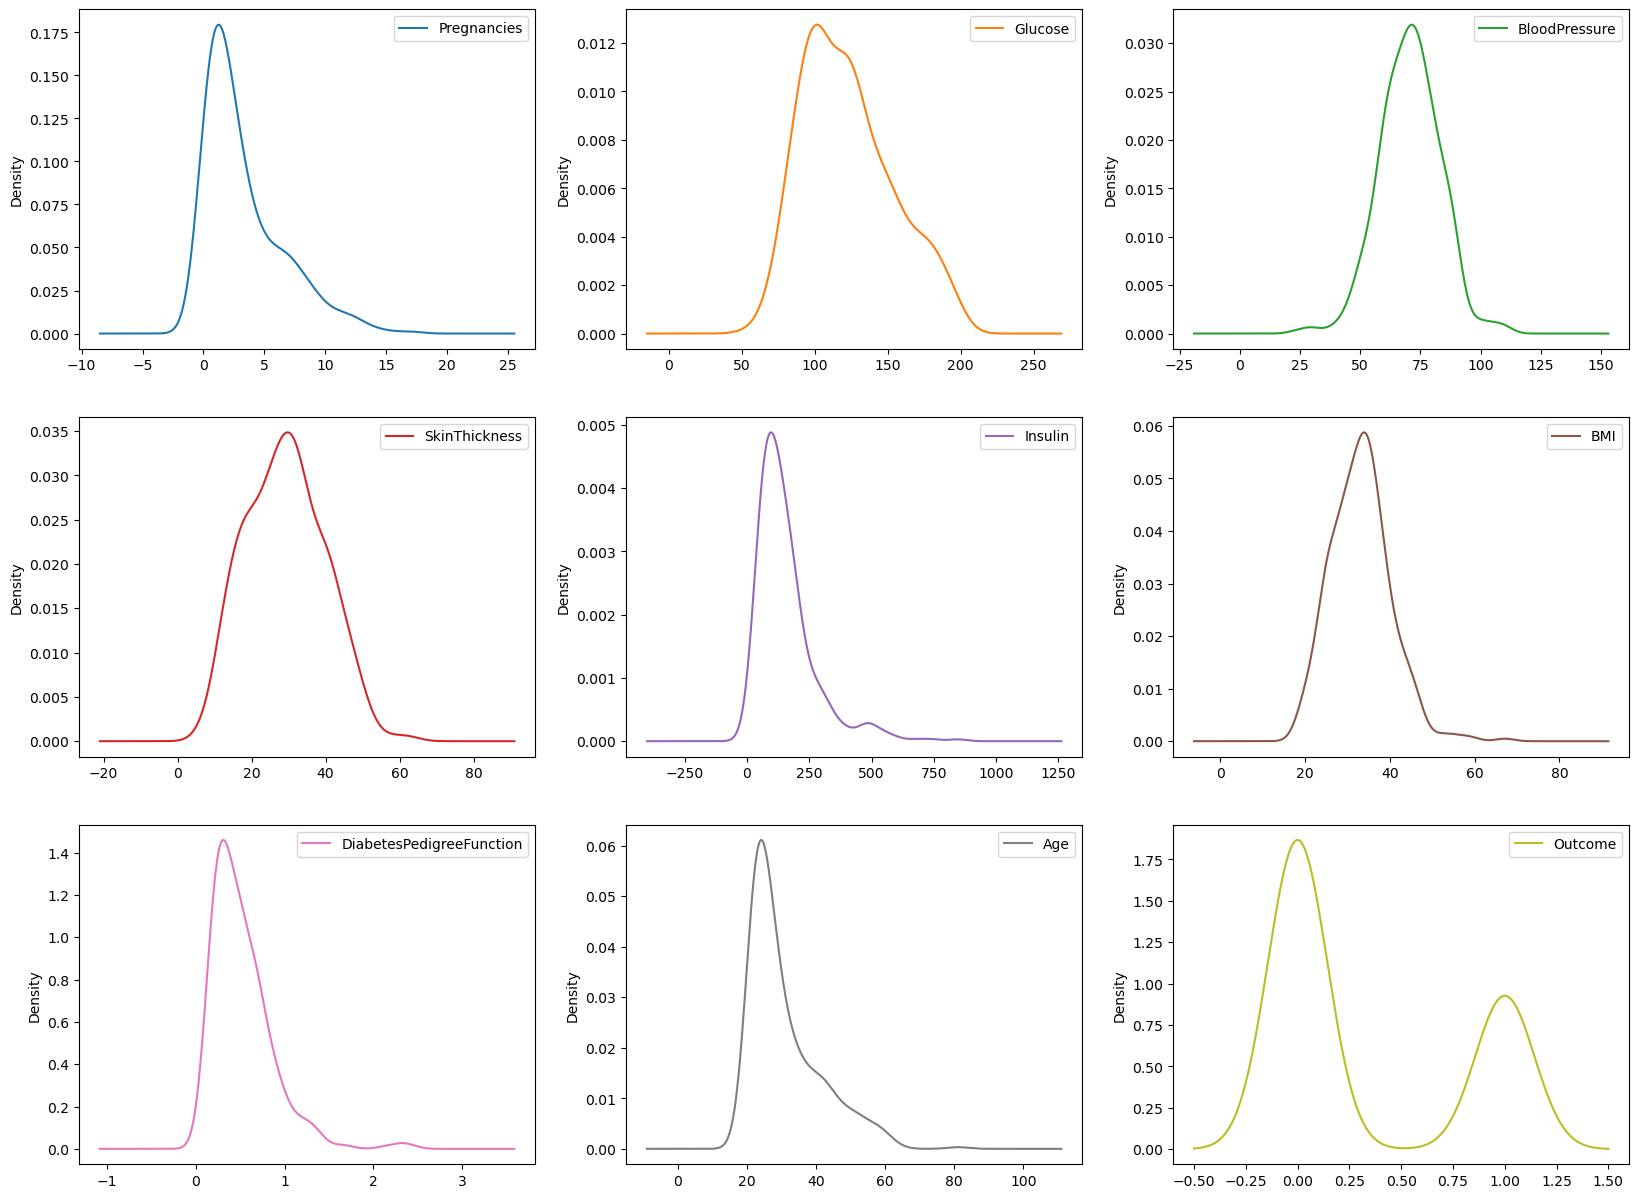

In [75]:
# Density plots for all attributes to visualize the distribution of each attribute
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

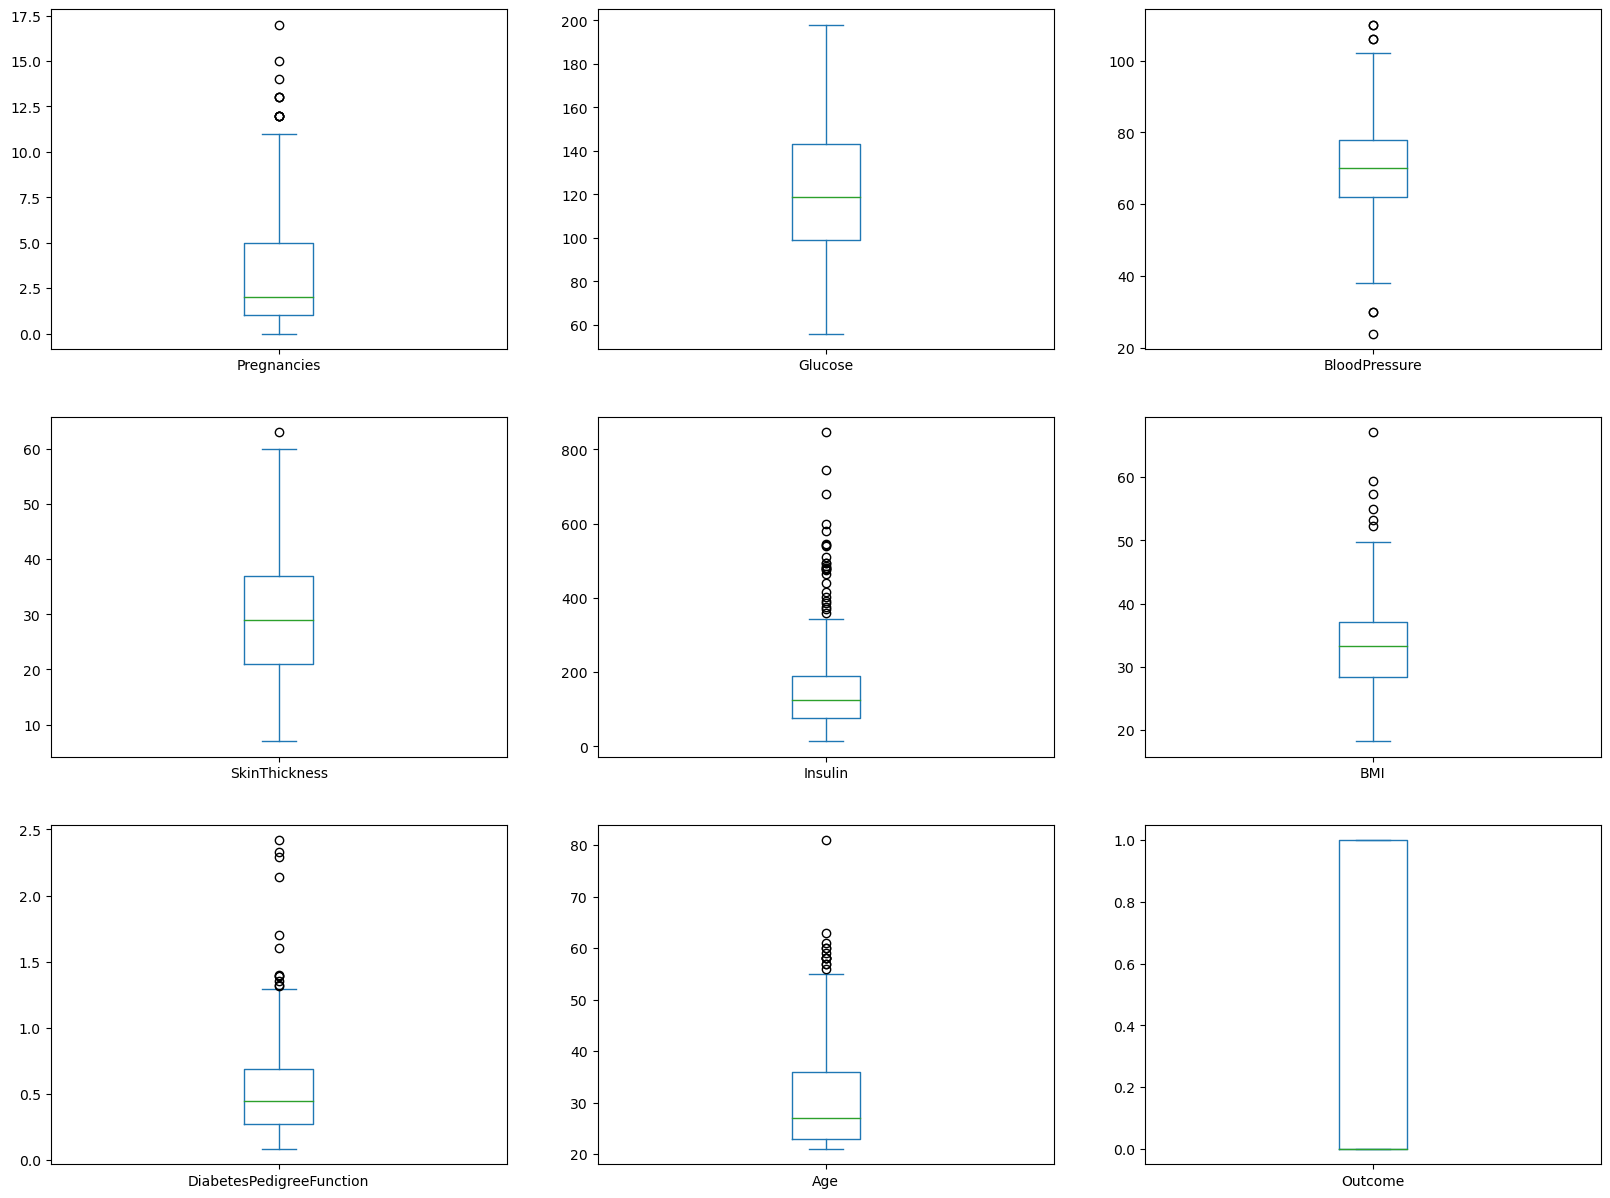

In [76]:
#Box and Whisker plot to visualize the distribution of all atributes
pima_all.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [77]:
numeric_columns = pima_all.select_dtypes(include=['number'])

# Calculate skewness for each row
skew = numeric_columns.skew(axis=1)

# Print the skewness values
print(skew)

3      0.711041
4      1.339072
6      0.631051
8      2.414030
13     2.756485
         ...   
753    2.391400
755    0.620941
760    1.315786
763    1.228541
765    0.907577
Length: 392, dtype: float64


In [78]:
corr_matrix_pearson = pima_all.corr(method='pearson', numeric_only=True)

# Print the Pearson correlation matrix
print(corr_matrix_pearson)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.198291       0.213355       0.093209   
Glucose                      0.198291  1.000000       0.210027       0.198856   
BloodPressure                0.213355  0.210027       1.000000       0.232571   
SkinThickness                0.093209  0.198856       0.232571       1.000000   
Insulin                      0.078984  0.581223       0.098512       0.182199   
BMI                         -0.025347  0.209516       0.304403       0.664355   
DiabetesPedigreeFunction     0.007562  0.140180      -0.015971       0.160499   
Age                          0.679608  0.343641       0.300039       0.167761   
Outcome                      0.256566  0.515703       0.192673       0.255936   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.078984 -0.025347                  0.007562   
Glucose                   0.581223  0.209

#### There are no strong correlation between the features. The 'strongest' ones are the following (as expected):
+ Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
+ Glucose x insulin (0.58)
+ Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM 
+ Skin fold thickness x BMI (0.66)  - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

##### Negative correlation:
+ BMI x Pregnancies (-0.025)
+ Blood Pressure x Diabetes Pedigree Function (-0.016)

<Axes: >

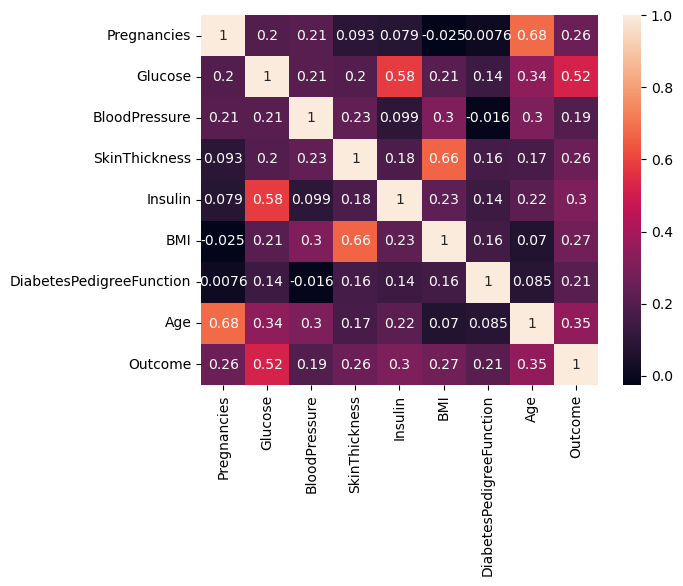

In [79]:
sns.heatmap(corr_matrix_pearson, annot = True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


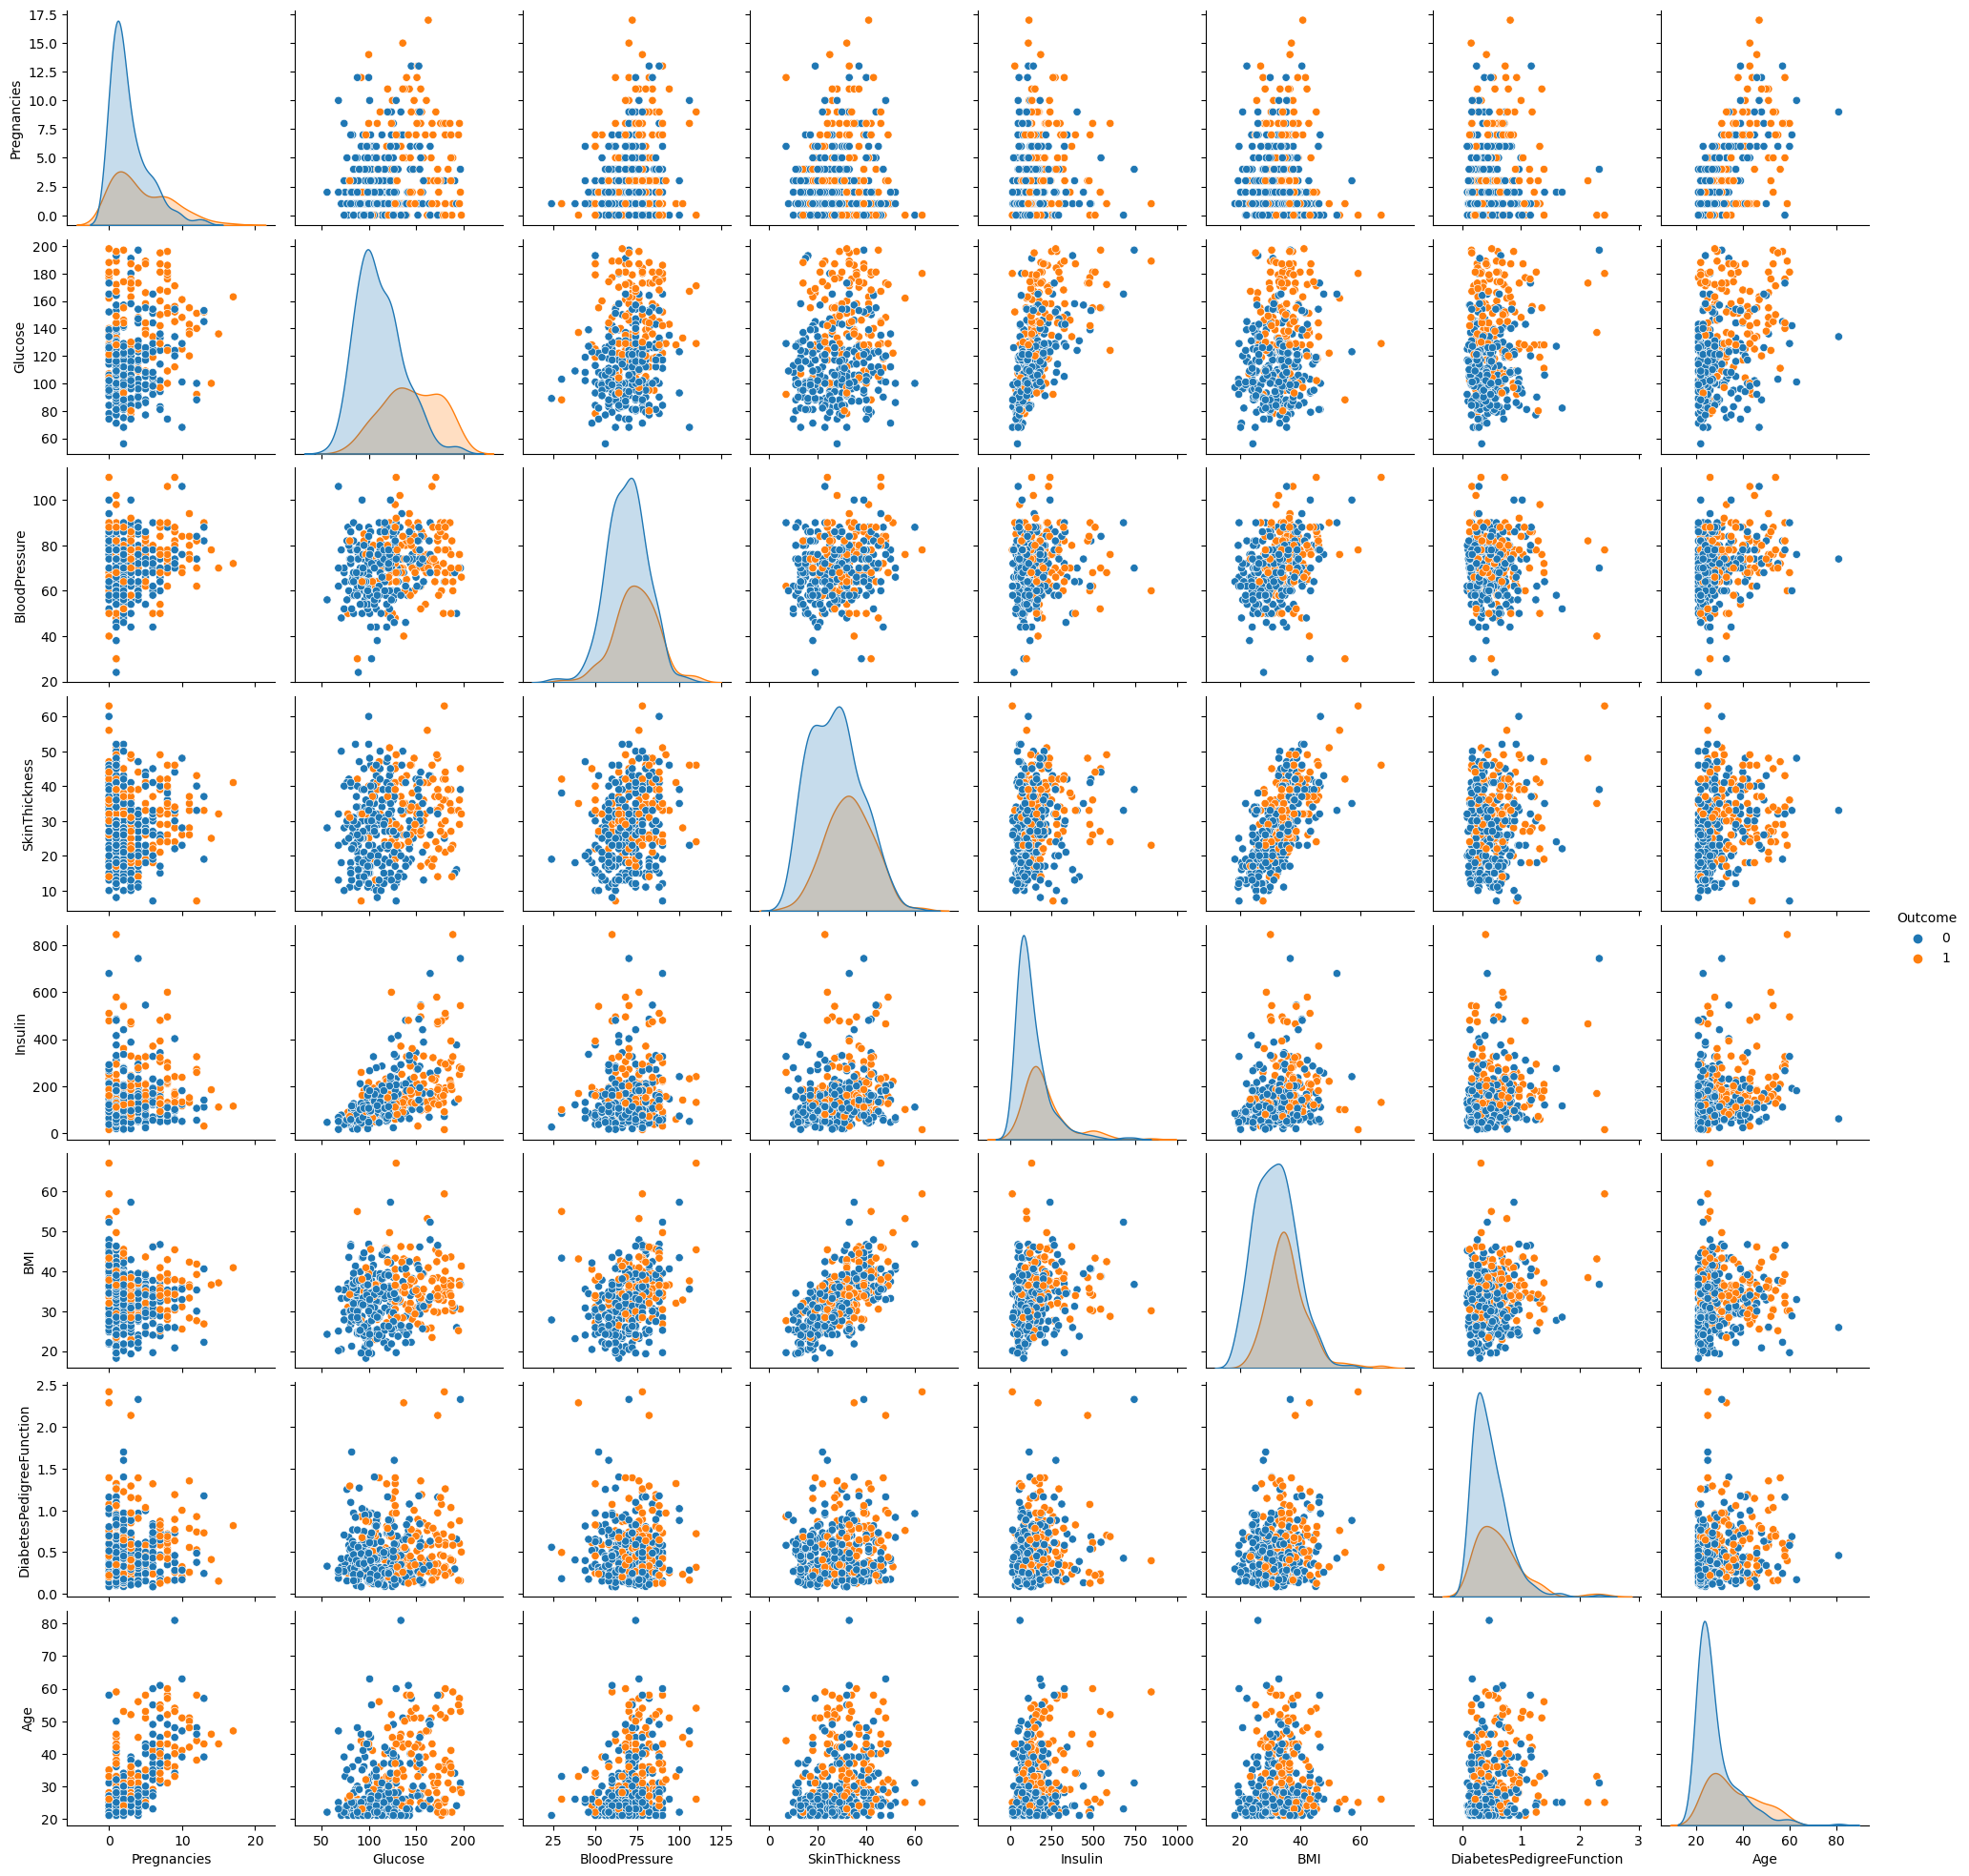

In [80]:
# Pairplot

sns.pairplot(pima_all, hue='Outcome')

## Logic Regression

In [81]:
#1st Iteration - 8 variables
var1=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=pima_all[var1]
y=pima_all.Outcome

In [82]:
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)

## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.563677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.1128
Time:                        13:05:43   Log-Likelihood:                -220.96
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 8.717e-10
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1299      0.049      2.655      0.008       0.034

In [83]:
#2nd Iteration - 3 variables
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.574607
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      389
Method:                           MLE   Df Model:                            2
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                 0.09558
Time:                        13:05:43   Log-Likelihood:                -225.25
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                 4.597e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.1405      0.037      3.826      0.000       0.069       0.212
Glucose           0.

In [84]:
logreg = LogisticRegression()
var2=["Pregnancies", "Glucose","BloodPressure"]
X=pima_all[var2]
y=pima_all.Outcome
logreg.fit(X,y)

## Defining the y_pred variable for the predicting values. 
y_pred=logreg.predict(X)

## Calculating the precision of the model
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



In [85]:
## Confusion matrix gives the number of cases that the model is able to accurately predict the outcomes, and the number of cases the model gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[229  33]
 [ 59  71]]


In [86]:
# Predict the outcome - knn

inputs = pima_all[['Glucose', 'Insulin', 'SkinThickness', 'BMI', 'Age']]

In [87]:
outputs = pima_all['Outcome']

In [88]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [89]:
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [90]:
# Evaluate knn


(knn.predict(inputs) == outputs).sum()

322

In [91]:
#Split the train set - 1/3 is to test

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs,outputs, test_size =0.33)

In [92]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [93]:
(knn.predict(inputs_test) == outputs_test).sum()

88

In [94]:
#Count how many women are Positive (1) and Negative (0) for diabetes in the test set 

outputs_test.value_counts()

0    82
1    48
Name: Outcome, dtype: int64

###  Check classification accuracy with knn = 5

In [95]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.676923076923077

In [96]:
# 10-fold cross-validation with knn = 5

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores

array([0.725     , 0.8       , 0.64102564, 0.61538462, 0.64102564,
       0.74358974, 0.66666667, 0.82051282, 0.76923077, 0.79487179])

In [97]:
scores.mean()

0.7217307692307692

# OTIMAL VALUE OF K

In [98]:
k_range = range(1,41)
k_scores = []

In [99]:
import numpy as np
import pandas as pd
from sklearn import neighbors as nei
from sklearn.model_selection import cross_val_score  # Import the cross_val_score function

# Assuming you have 'inputs' and 'outputs' defined elsewhere
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, inputs, outputs, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())


In [100]:
k_scores

[0.7222435897435897,
 0.7396794871794872,
 0.7297435897435897,
 0.7369871794871795,
 0.7217307692307692,
 0.7396153846153846,
 0.7522435897435897,
 0.7523717948717948,
 0.7499358974358974,
 0.7625641025641026,
 0.7702564102564102,
 0.7625641025641026,
 0.7652564102564102,
 0.7574358974358975,
 0.7473717948717948,
 0.7472435897435897,
 0.7575,
 0.7549358974358974,
 0.752371794871795,
 0.7575641025641026,
 0.755,
 0.7498076923076923,
 0.7472435897435897,
 0.7548717948717949,
 0.7472435897435898,
 0.7497435897435898,
 0.7471794871794872,
 0.7523076923076923,
 0.7471794871794872,
 0.7523076923076923]

Text(0, 0.5, 'Cross-validation accuracy')

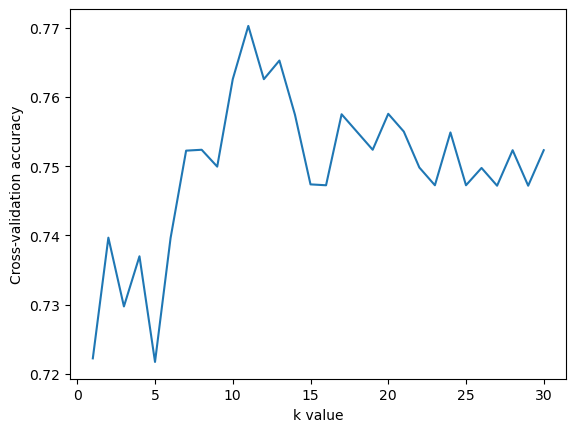

In [101]:
#Visualise best k number

plt.plot(k_range, k_scores)
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [102]:
knn = nei.KNeighborsClassifier(n_neighbors=10)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [103]:
(knn.predict(inputs_test) == outputs_test).sum()

88

In [104]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy #76.1%

0.676923076923077

In [105]:
# 10-fold cross-validation with knn = 3

scores = cross_val_score (knn, inputs, outputs, cv =10, scoring = 'accuracy')
scores #accuracy scores arrays (from 61.5% to 84.6%)

array([0.8       , 0.8       , 0.69230769, 0.61538462, 0.69230769,
       0.84615385, 0.71794872, 0.87179487, 0.79487179, 0.79487179])

In [106]:
# Average accuracy score

scores.mean()

0.7625641025641026

# cross validation

In [107]:
from sklearn.model_selection import KFold

# KFold without shuffle
kf = KFold(n_splits=10, shuffle=False)


In [108]:
lg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the RFECV object with the StratifiedKFold cross-validation
rfecv = RFECV(estimator=lg, step=1, cv=skf, scoring='accuracy')

# Fit the RFECV object to your data
rfecv.fit(X, y)

# Print the results or perform further analysis
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 2


In [109]:
lg = LogisticRegression()

In [110]:
rfecv = RFECV (estimator=lg,step=1, cv=skf, scoring='accuracy')

In [111]:
rfecv.fit(inputs, outputs)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

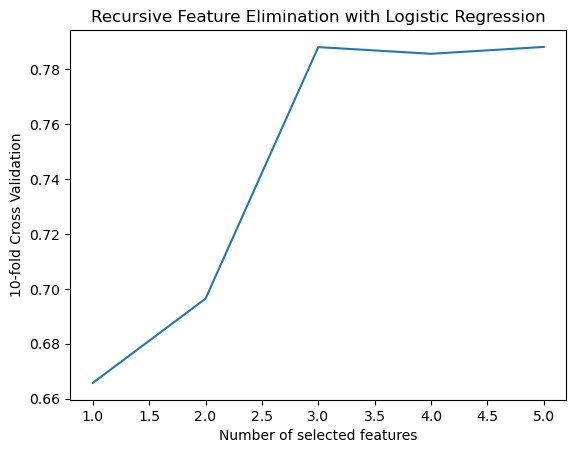

In [112]:


plt.figure()
plt.title('Recursive Feature Elimination with Logistic Regression')
plt.xlabel('Number of selected features')
plt.ylabel('10-fold Cross Validation')

# Use cv_results_['mean_test_score'] instead of grid_scores_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

plt.show()

# Optimal number of features (=5) more suitable to predict the outcome


In [113]:
feature_names = pima_all.columns[:10]
feature_names

Index(['Pregnancies', 'Glucose', 'Glucose Result', 'BloodPressure',
       'Percentile skin thickness', 'SkinThickness', 'Insulin', 'BMI',
       'Nutritional Status', 'DiabetesPedigreeFunction'],
      dtype='object')

In [114]:
X = pima_all[feature_names]

In [115]:
new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True),
 ('Glucose', True),
 ('Glucose Result', True),
 ('BloodPressure', True),
 ('Percentile skin thickness', True)]

In [116]:
new_inputs = pima_all[['Pregnancies','Glucose', 'BloodPressure','SkinThickness']]

In [117]:
knn = nei.KNeighborsClassifier(n_neighbors=10)

In [118]:
knn.fit(new_inputs, outputs)

KNeighborsClassifier(n_neighbors=10)

In [119]:
(knn.predict(new_inputs) == outputs).sum()

304

In [120]:
new_inputs_train, new_inputs_test, outputs_train, outputs_test = mod.train_test_split(new_inputs,outputs, test_size =0.33)

In [121]:
knn.fit(new_inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=10)

In [122]:
(knn.predict(new_inputs_test) == outputs_test).sum()

103

In [123]:
outputs_pred_new_inputs = knn.predict(new_inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred_new_inputs)
accuracy

0.7923076923076923

In [124]:
scores = cross_val_score (knn, new_inputs, outputs, cv =10, scoring = 'accuracy')
scores.mean()

0.7551923076923076

# Logistic Regression

In [125]:
lg = LogisticRegression()

In [126]:
lg_accuracy = cross_val_score(lg,inputs,outputs,cv=10,scoring='accuracy')

In [127]:
lg_accuracy.mean()

0.7828846153846154

##### Logistic Regression has a better average accuracy score than knn.

In [128]:
lg.fit(inputs_train,outputs_train)

LogisticRegression()

In [129]:
outputs_pred=lg.predict(inputs_test)
accuracy_lg = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy_lg

0.6384615384615384

### Naive Bayes


In [130]:
mnb = MultinomialNB()
mnb.fit(inputs_train, outputs_train)
out_pred = mnb.predict(inputs_test)
accuracy_mnb = accuracy_score(outputs_test, out_pred)
accuracy_mnb

0.5923076923076923

# Confusion Matrix

In [131]:
conf_mtx_nb = metrics.confusion_matrix(outputs_test, out_pred)
conf_mtx_nb

array([[67, 22],
       [31, 10]])

In [132]:
conf_mtx_new_features = metrics.confusion_matrix(outputs_test, outputs_pred_new_inputs)
conf_mtx_new_features

array([[81,  8],
       [19, 22]])

In [133]:
precision_nb = metrics.precision_score(outputs_test, out_pred)
precision_nb

0.3125

In [134]:
precision_new_features = metrics.precision_score(outputs_test,outputs_pred_new_inputs)
precision_new_features

0.7333333333333333

In [135]:
recall = metrics.recall_score(outputs_test, out_pred)
recall

0.24390243902439024

In [136]:
recall_new_features = metrics.recall_score(outputs_test,outputs_pred_new_inputs)
recall_new_features

0.5365853658536586

In [137]:
out_pred_prob = mnb.predict_proba(inputs_test)[:,1]
out_pred_prob

array([0.51229659, 0.34706038, 0.22212595, 0.63903744, 0.16995207,
       0.3307375 , 0.05919581, 0.39835426, 0.62292417, 0.28011144,
       0.0277489 , 0.52892419, 0.20023246, 0.50955606, 0.26184414,
       0.46747844, 0.1999966 , 0.14110701, 0.61782468, 0.54437414,
       0.53617828, 0.45271451, 0.17952155, 0.07009248, 0.54503078,
       0.253712  , 0.07944733, 0.3069542 , 0.43490349, 0.15961259,
       0.46985835, 0.22983852, 0.54831437, 0.41670867, 0.28999787,
       0.25349113, 0.35076396, 0.6337274 , 0.24837821, 0.54089992,
       0.28429407, 0.2539984 , 0.67447895, 0.39383109, 0.24004459,
       0.08319527, 0.29289008, 0.14184972, 0.11536231, 0.23385289,
       0.32900659, 0.41541042, 0.65931552, 0.3913992 , 0.30992936,
       0.40524997, 0.78760671, 0.03227046, 0.51794046, 0.22245746,
       0.34006711, 0.41593826, 0.56413179, 0.44711075, 0.49645654,
       0.37140458, 0.33344713, 0.03503612, 0.32596963, 0.53826263,
       0.43163888, 0.27334614, 0.76771453, 0.23492891, 0.45012

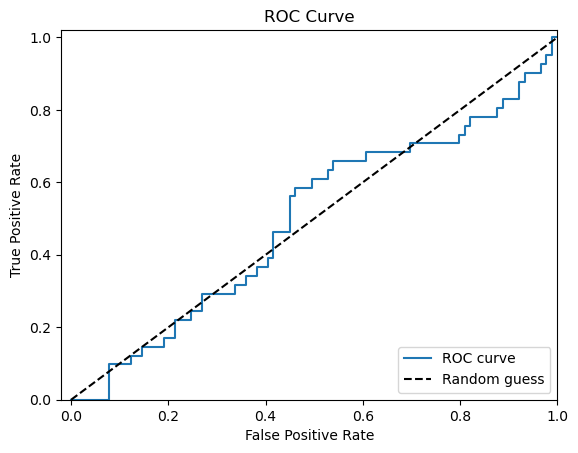

In [138]:
fpr, tpr, thresholds = roc_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [139]:
ras = roc_auc_score(outputs_test, out_pred_prob)
ras

0.49438202247191015

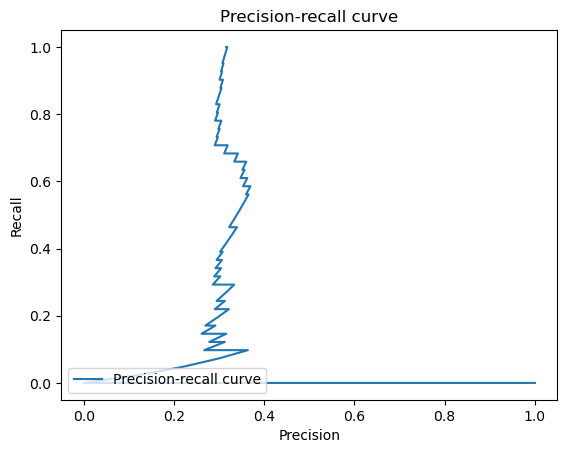

In [140]:
precision, recall, thresholds = precision_recall_curve(outputs_test, out_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [141]:
aps = average_precision_score(outputs_test, out_pred_prob)
aps

0.31404159718393543